In [1]:
import pandas as pd
import numpy as np
import lib_tools as pt # Import Project Tools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import date

start_year = 2005
end_year = 2021

# load data into dictionnaries
dic_usagers = pt.load_usagers(start_year, end_year)
dic_caract = pt.load_caract(start_year, end_year)
dic_vehic = pt.load_vehicules(start_year=start_year, end_year=end_year)
dic_lieux = pt.load_lieux(start_year=start_year, end_year=end_year)

### Prepare df_usagers

In [2]:
# Concat all df usagers
# from 2005 to 2018 -> ['secu'] is splitted into ['secu1', 'secu2', 'secu3']
for year in range(start_year, end_year+1):
    df = dic_usagers[year]    
    if 2005 <= year <= 2018:
        # create columns ['secu1', 'secu2', 'secu3'] and drop old 'secu'
        df['secu'] = df['secu'].replace(to_replace=np.nan, value=-1)
        df['secu1'] = df['secu'] // 10
        df['secu2'] = df['secu'] % 10
        df['secu3'] = np.ones(len(df['secu']))*(-1)

        df = df.drop(columns=['secu'])
        df['secu1'] = df['secu1'].astype('int')
        df['secu2'] = df['secu2'].astype('int')
        df['secu3'] = df['secu3'].astype('int')
    
    if year == start_year:
        df_usagers = df
    else:
        df_usagers = pd.concat([df_usagers, df], axis=0)

# check number of lines
nb_lines = 0
for year in range(start_year, end_year+1):
    nb_lines += dic_usagers[year].shape[0]
    
print('somme des lignes :', nb_lines)
print('nb de lignes de df_usagers', df_usagers.shape[0])

somme des lignes : 2509620
nb de lignes de df_usagers 2509620


### Prepare df_caract

In [3]:
for year in range(start_year, end_year+1):
    df = dic_caract[year]
    if 'gps' in df.columns:
        df = df.drop(columns=['gps'], axis=1)
    if year == start_year:
        df_caract = df
    else:
        df_caract = pd.concat([df_caract, df], ignore_index=True, axis=0)

df_caract['an'] = df_caract['an'].replace(to_replace=[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 
                                          value=[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 
                                                 2015, 2016, 2017, 2018])
        
        
# check number of lines
nb_lines = 0
for year in range(start_year, end_year+1):
    nb_lines += dic_caract[year].shape[0]

print('somme des lignes :', nb_lines)
print('nb de lignes de df_caract', df_caract.shape[0])

somme des lignes : 1121571
nb de lignes de df_caract 1121571


### Prepare df_vehic

In [4]:
df_vehic = pd.DataFrame(columns=['Num_Acc', 'id_vehicule', 'num_veh', 'senc', 'catv', 'obs', 'obsm', 
                                 'choc', 'manv', 'motor', 'occutc'])

for year in range(start_year, end_year+1):
    df = dic_vehic[year]
    if year == start_year:
        df_vehic = df
    else:
        df_vehic = pd.concat([df_vehic, df], ignore_index=True, axis=0)
        
# check number of lines
nb_lines = 0
for year in range(start_year, end_year+1):
    nb_lines += dic_vehic[year].shape[0]

print('somme des lignes :', nb_lines)
print('nb de lignes de df_caract', df_vehic.shape[0])

# for col in df_vehic.columns:
#     print(f'{col} : ', df_vehic[col].unique())

somme des lignes : 1914902
nb de lignes de df_caract 1914902


### Prepare df_lieux

In [5]:
# for year in range(start_year, end_year+1):
#     df = dic_lieux[year]
#     print(f'{year : }', df.columns)

for year in range(start_year, end_year+1):
    df = dic_lieux[year]
    if year == start_year:
        df_lieux = df
    else:
        df_lieux = pd.concat([df_lieux, df], ignore_index=True, axis=0)
        
# check number of lines
nb_lines = 0
for year in range(start_year, end_year+1):
    nb_lines += dic_lieux[year].shape[0]

print('somme des lignes :', nb_lines)
print('nb de lignes de df_caract', df_lieux.shape[0])

# for col in df_lieux.columns:
#     print(f'{col} : ', df_lieux[col].unique())

somme des lignes : 1121571
nb de lignes de df_caract 1121571


###  Check for duplicated and remove them

In [6]:
print("Avant suppression des doublons : \n")
print(' - usagers en doublons : ', df_usagers.duplicated().sum())
print(' - caractéristiques en doublons :', df_caract.duplicated().sum())
print(' - véhicules en doublons :', df_vehic.duplicated().sum())
print(' - lieux en doublons : ', df_lieux.duplicated().sum())

df_usagers.drop_duplicates(inplace=True)
df_caract.drop_duplicates(inplace=True)
df_vehic.drop_duplicates(inplace=True)
df_lieux.drop_duplicates(inplace=True)

Avant suppression des doublons : 

 - usagers en doublons :  2858
 - caractéristiques en doublons : 0
 - véhicules en doublons : 0
 - lieux en doublons :  0


### Merge data into one DataFrame

In [7]:
df = df_usagers.merge(on=['Num_Acc'], right=df_caract, how='left')
df = df.merge(on=['Num_Acc', 'id_vehicule', 'num_veh'], right=df_vehic, how='left')
df = df.merge(on='Num_Acc', right=df_lieux, how='left')

### Check null values

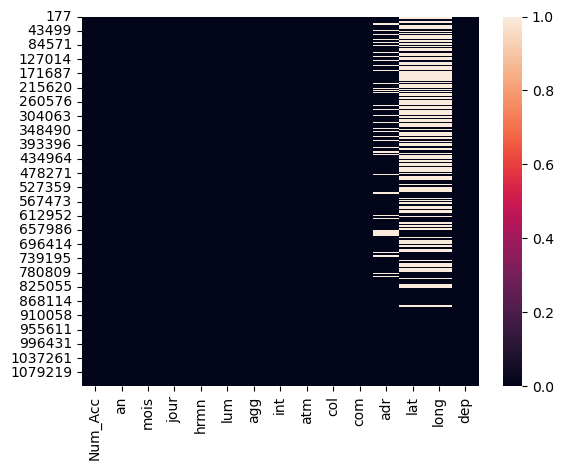

In [8]:
df_sample = df_caract.sample(10000)
df_sample = df_sample.sort_values(by='Num_Acc', ascending=True)
sns.heatmap(df_sample.isna());

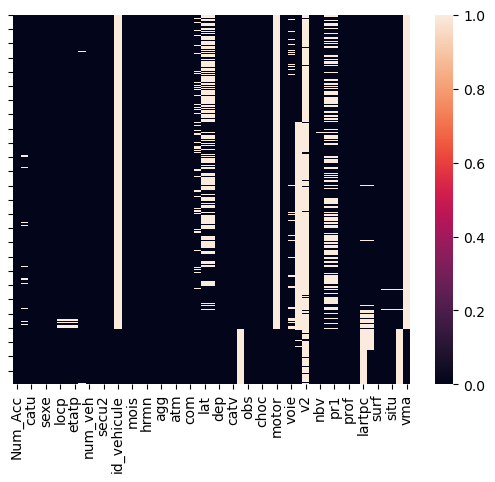

In [9]:
df_sample = df.sample(10000)
df_sample = df_sample.sort_values(by='Num_Acc', ascending=True)
ax = sns.heatmap(df_sample.isna())
ax.axes.yaxis.set_ticklabels('');

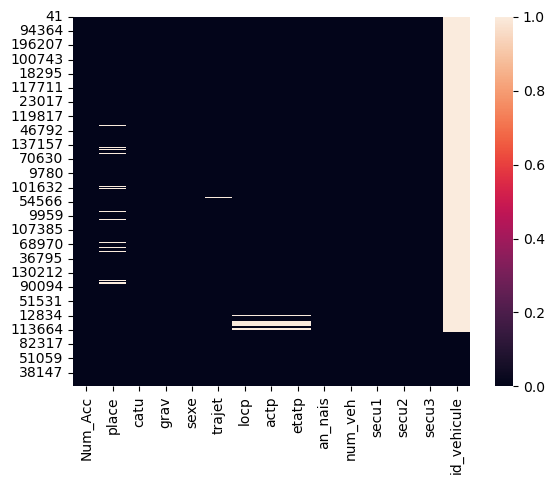

In [10]:
df_sample = df_usagers.sample(10000)
df_sample = df_sample.sort_values(by='Num_Acc', ascending=True)
sns.heatmap(df_sample.isna());

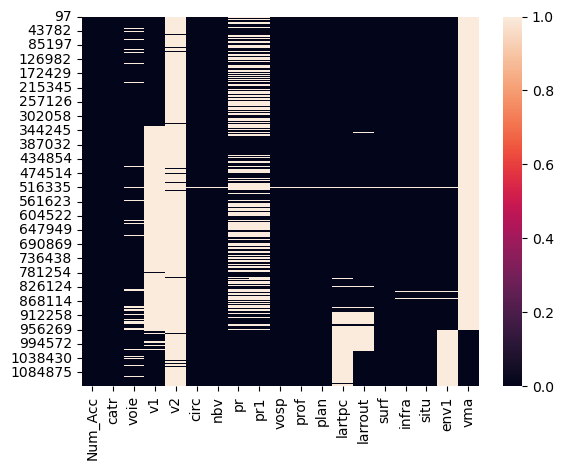

In [11]:
df_sample = df_lieux.sample(10000)
df_sample = df_sample.sort_values(by='Num_Acc', ascending=True)
sns.heatmap(df_sample.isna());

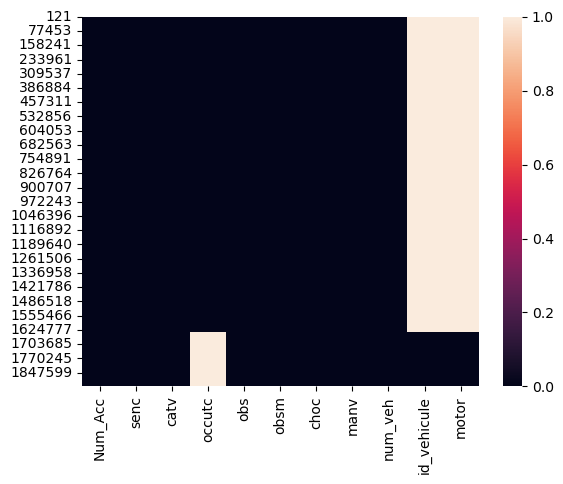

In [12]:
df_sample = df_vehic.sample(10000)
df_sample = df_sample.sort_values(by='Num_Acc', ascending=True)
sns.heatmap(df_sample.isna());

### Volume des données

In [13]:
# nb de lignes et colonnes de chaque DataFrame

dic = {'caract' : dic_caract, 'lieux' : dic_lieux, 'usagers': dic_usagers, 'vehic' : dic_vehic}

for key in dic.keys() : 
    print(f"\n{key} : \n")
    nb_lin = []
    nb_col = []
   
    for year in range(start_year, end_year+1):
        dic_data = dic[key]
        df = dic_data[year]
        nb_lin.append(df.shape[0])
        nb_col.append(df.shape[1])
        print(f'{key} {year} : {df.shape[1]} colonnes x {df.shape[0]} lignes')

    print(f"\nnombre de lignes min : {min(nb_lin)}")    
    print(f"\nnombre de lignes max : {max(nb_lin)}")    


caract : 

caract 2005 : 16 colonnes x 87026 lignes
caract 2006 : 16 colonnes x 82993 lignes
caract 2007 : 16 colonnes x 83850 lignes
caract 2008 : 16 colonnes x 76767 lignes
caract 2009 : 16 colonnes x 74409 lignes
caract 2010 : 16 colonnes x 69379 lignes
caract 2011 : 16 colonnes x 66974 lignes
caract 2012 : 16 colonnes x 62250 lignes
caract 2013 : 16 colonnes x 58397 lignes
caract 2014 : 16 colonnes x 59854 lignes
caract 2015 : 16 colonnes x 58654 lignes
caract 2016 : 16 colonnes x 59432 lignes
caract 2017 : 16 colonnes x 60701 lignes
caract 2018 : 16 colonnes x 57783 lignes
caract 2019 : 15 colonnes x 58840 lignes
caract 2020 : 15 colonnes x 47744 lignes
caract 2021 : 15 colonnes x 56518 lignes

nombre de lignes min : 47744

nombre de lignes max : 87026

lieux : 

lieux 2005 : 18 colonnes x 87026 lignes
lieux 2006 : 18 colonnes x 82993 lignes
lieux 2007 : 18 colonnes x 83850 lignes
lieux 2008 : 18 colonnes x 76767 lignes
lieux 2009 : 18 colonnes x 74409 lignes
lieux 2010 : 18 colo

### Analyse intercorrelations between variables

In [14]:
target = df['grav']
data = df.drop(columns=['grav'], axis=1)
# set 'grav' as last column
data['grav'] = target

data = data.fillna(data.median())
# data_clean = data.dropna(how='any')

data_sample = data.sample(10000)
corr = data_sample.corr()

sns.heatmap(corr, annot=False, cmap='coolwarm');
sns.clustermap(corr, annot=False, cmap='coolwarm');

KeyError: 'grav'

### Existence de Null

### Evolution de gravité 'Blessé hospitalisé' en 2019?

In [15]:
df_usagers_2018 = df_usagers[df_usagers['Num_Acc'].astype('str').str[:4] == '2018']
df_usagers_2019 = df_usagers[df_usagers['Num_Acc'].astype('str').str[:4] == '2019']

# sns.histplot(df_usagers_2018.grav)
# ax = plt.hist([df_usagers_2018.grav, df_usagers_2019.grav], color=['r', 'b'], alpha=0.5)


print("\nDistribution de la variable gravité en 2018 : \n")
print(df_usagers_2018.grav.value_counts(normalize=True))

print("\nDistribution de la variable gravité en 2019 : \n")
print(df_usagers_2019.grav.value_counts(normalize=True))



Distribution de la variable gravité en 2018 : 

1    0.416418
4    0.386983
3    0.170503
2    0.026096
Name: grav, dtype: float64

Distribution de la variable gravité en 2019 : 

1    0.415959
4    0.400795
3    0.156928
2    0.026318
Name: grav, dtype: float64
